# Gridded Weather

  0%|          | 0/41 [00:00<?, ? frames/s]


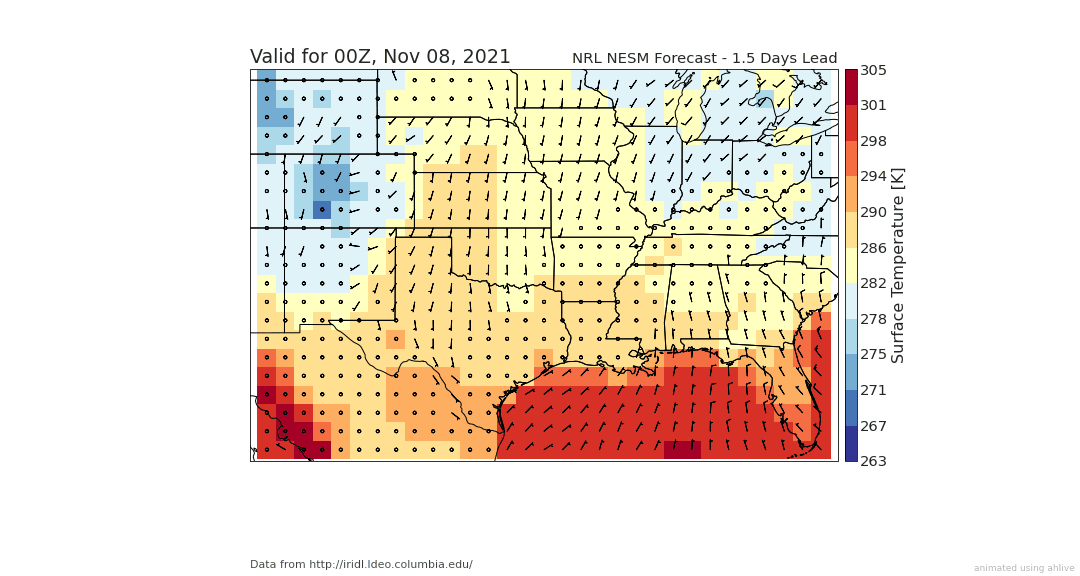

In [2]:
import xarray as xr
import ahlive as ah

# load zonal and meridional winds + temperature data over the Midwest
ds = xr.merge([
    xr.open_dataset(
        f"http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.NRL/.NESM/.forecast/.{var}/dods",
        chunks={'S': 1, 'L': 1}
    ).isel(M=0, L=1, S=slice(-4, -1)).sel(X=slice(250, 280), Y=slice(25, 45))
    for var in ["uas", "vas", "ts"]
]).load()

# add valid time
ds.coords["T"] = ds["S"] + ds["L"]

# initialize wind barb overlay
ah_ds_wind = ah.Dataset(
    # map data onto axes
    ds,
    xs="X",
    ys="Y",
    us="uas",
    vs="vas",
    chart="windbarb",
    length=4.5,

    # add geography
    crs="PlateCarree",
    coastline=True,
    states=True,

    # add labels
    title="Valid for",
    subtitle="NRL NESM Forecast - 1.5 Days Lead",
    caption="Data from http://iridl.ldeo.columbia.edu/",
    clabel="Surface Temperature [K]",
    state_labels="T",

    # make canvas bigger
    figsize=(15, 8),

    # control speed of animation
    frames=20,
    fps=5
)

# initialize pcolormesh underlay
ah_ds_ts = ah.Dataset(
    ds,
    xs="X",
    ys="Y",
    cs="ts",
    chart="pcolormesh",
    crs="PlateCarree",
)

# stack them and configure state labels
ah_ds = (
    ah_ds_wind *
    ah_ds_ts
).config(
    "state", xy="title", format="%HZ, %b %d, %Y"
)

ah_ds.render()